In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.decomposition import PCA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
a = "1,046,492	1,167,142	1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
# Resid_total
import pandas as pd

# convert the string to a list of strings, then remove commas
# convert the list to a pandas Series object
a_list = [s.replace(',', '') for s in a]
data = pd.Series(a_list)

# convert the Series to a numeric type

data = pd.to_numeric(data)

# print the resulting time series dataset
# print(data)


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# generate a time series dataset

# fit an ARIMA model
arima_model = sm.tsa.arima.ARIMA(data, order=(2,1,1))
arima_results = arima_model.fit()

# print summary of the model fit
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   51
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -609.231
Date:                Wed, 26 Apr 2023   AIC                           1226.461
Time:                        17:58:03   BIC                           1234.109
Sample:                             0   HQIC                          1229.374
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0793      0.118      9.157      0.000       0.848       1.310
ar.L2         -0.0809      0.066     -1.218      0.223      -0.211       0.049
ma.L1         -0.9952      0.134     -7.447      0.0

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1     1.137422e+06
2     1.183198e+06
3     1.201247e+06
4     1.195796e+06
5     1.151373e+06
          ...     
58    1.561889e+06
59    1.568106e+06
60    1.574312e+06
61    1.580506e+06
62    1.586690e+06
Name: predicted_mean, Length: 62, dtype: float64


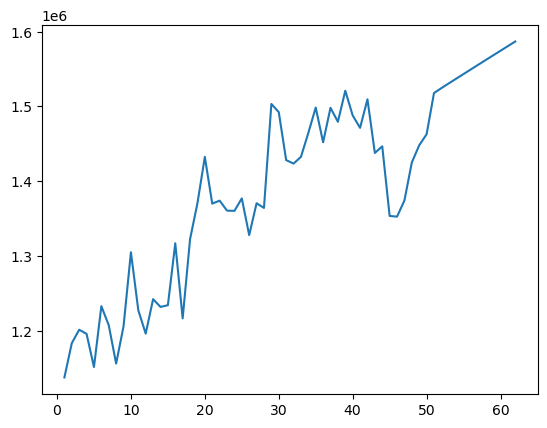

In [4]:
forecast = arima_results.predict(start=1, end=len(data)+11)

# Print the forecasted values
print(forecast)
plt.plot(forecast)

In [5]:
# load data with two year shift
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data

data_fut = data[['2019','2020']]
data_fut
df = data_fut
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
data_fut = df
data2 = data.drop(['Data_Status', 'State','2019','2020'],axis=1)
data2
a = "1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596																																																				"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
feature_list = data3.index.tolist()
feature_list.remove("ResidCA")
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)
data5

,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA,ResidUS
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,1.39,55.8,1.40,55.4,4.14,10.5,748.0,3169.0,1192848,14861651
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,1.40,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1189801,14919481
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1148722,14651895
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1220587,14814536
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1202586,15417206
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1154079,15663022
1976,1.60,149.6,1.60,149.6,1.60,149.6,3.59,28.4,3.59,28.4,...,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1196279,16143315
1977,1.70,169.1,1.70,169.1,1.70,169.1,3.97,33.0,3.97,33.0,...,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1290698,15813447
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1226364,15731634
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1192869,15247535


In [6]:
import pandas as pd
import statsmodels.api as sm


# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[feature_list[:-1]])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 517.645
Date:                Wed, 26 Apr 2023   AIC                           -423.291
Time:                        17:58:06   BIC                            155.606
Sample:                    01-01-1970   HQIC                          -203.658
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ARICD          0.0301   3.93e-08   7.65e+05      0.000       0.030       0.030
ARICV          2.7354   4.68e-06   5.84e+05      0.000       2.735       2.735
ARTCD          0.0301   3.91e-08   7.69e+05      0.0

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


1971-01-01    1189801.0
1972-01-01    1148722.0
1973-01-01    1220587.0
1974-01-01    1202586.0
1975-01-01    1154079.0
1976-01-01    1196279.0
1977-01-01    1290698.0
1978-01-01    1226364.0
1979-01-01    1192869.0
1980-01-01    1232826.0
1981-01-01    1226313.0
1982-01-01    1227952.0
1983-01-01    1304360.0
1984-01-01    1217724.0
1985-01-01    1308727.0
1986-01-01    1359856.0
1987-01-01    1420797.0
1988-01-01    1367856.0
1989-01-01    1367567.0
1990-01-01    1355310.0
1991-01-01    1354131.0
1992-01-01    1369438.0
1993-01-01    1325392.0
1994-01-01    1361384.0
1995-01-01    1358381.0
1996-01-01    1486214.0
1997-01-01    1485795.0
1998-01-01    1426721.0
1999-01-01    1417985.0
2000-01-01    1425659.0
2001-01-01    1455716.0
2002-01-01    1489320.0
2003-01-01    1449101.0
2004-01-01    1488574.0
2005-01-01    1474374.0
2006-01-01    1511586.0
2007-01-01    1483981.0
2008-01-01    1466657.0
2009-01-01    1500559.0
2010-01-01    1437024.0
2011-01-01    1440463.0
2012-01-01    13

C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\2791670771.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

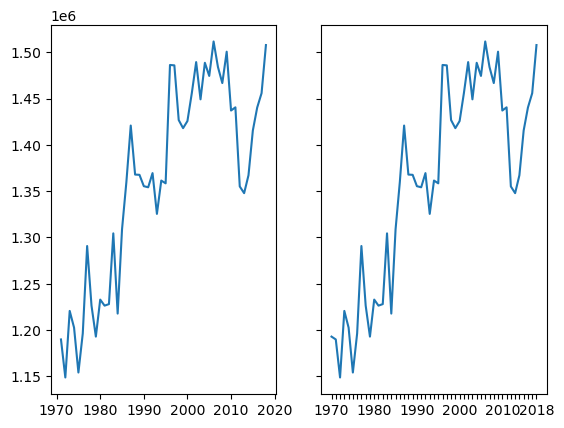

In [11]:
forecast = results.predict(start=1, end=48, exog=data5[feature_list[:-1]])

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)

x_values = data5.index
x_values = ['' if int(year)%10 != 0 and int(year) != 2018 else year for year in x_values]
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

In [12]:
data_fut = data_fut.fillna(0)

C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\1818023078.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

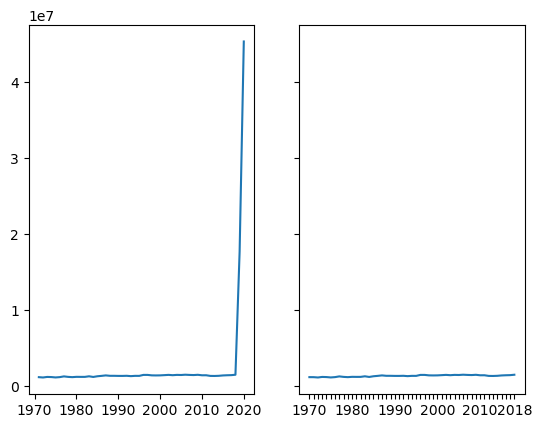

In [14]:
forecast = results.predict(start=1, end=50, exog=data_fut)

# Print the forecasted values
# print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

2019-01-01    1.768077e+07
2020-01-01    4.527639e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3952776612.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

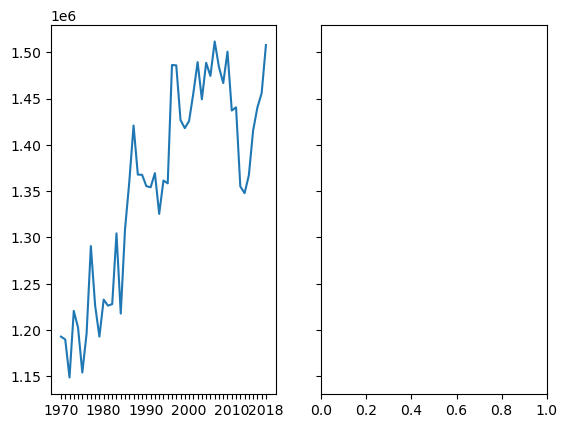

In [15]:
forecast = results.forecast(steps=2,exog = data_fut)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax2.plot(forecast)
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

In [16]:
# data load and combine
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data
data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
data3 = pd.concat([data2,Resid_total])
data3
a = "1,046,492	1,167,142	1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "13,728,645	14,210,554	14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596																																																				"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)

In [17]:
a = data5.columns.tolist()

In [18]:
df = data5[a]
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.show()

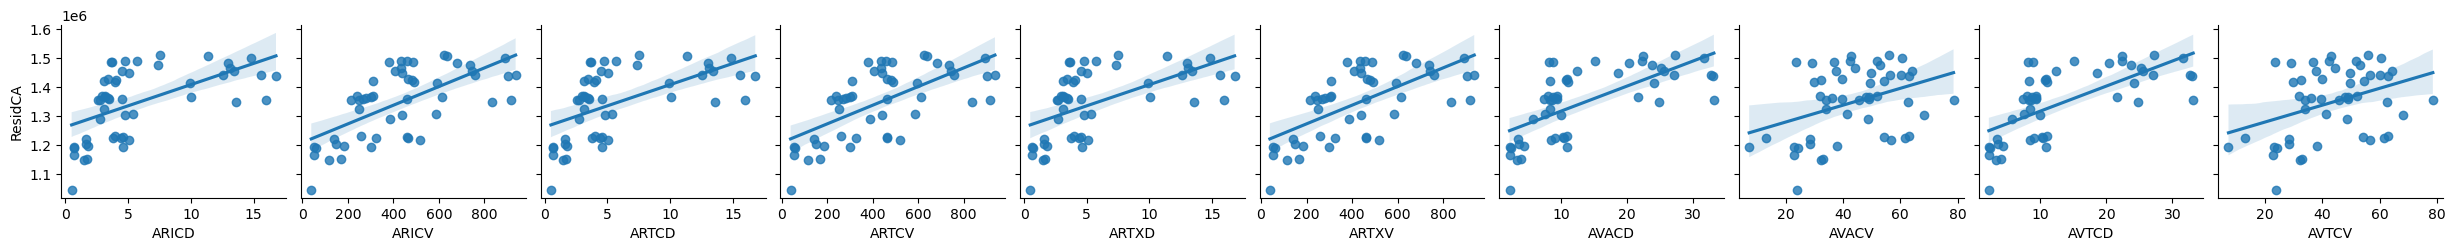

In [19]:
sns.pairplot(data5, x_vars=feature_list[:10], y_vars='ResidCA', kind='reg')
plt.show()

In [20]:
# Load dataset
df = data5
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.5 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.8].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

,ResidCA,DFSCB,ESCCD,ESCCV,ESICV,ESRCD,ESRCV,ESSCB,ESTCD,ESTCV,...,TEPFB,TERCD,TERCV,TNASB,TNCSB,TNSCB,TPOPP,WWIXB,WWSCB,ResidUS
1970,1046492,224717.0,5.02,696.1,392.2,6.53,797.6,396018.0,4.76,1886.6,...,1472146.0,1.91,1401.4,1814301.0,435890.0,4026993.0,20007.0,59783.0,40107.0,13728645
1971,1167142,273402.0,5.31,774.0,425.9,6.78,903.8,419853.0,5.01,2104.4,...,1505667.0,1.95,1616.7,1888925.0,479285.0,4241990.0,20346.0,61039.0,40860.0,14210554
1972,1192848,265247.0,5.63,911.8,488.7,7.22,1017.2,451137.0,5.36,2418.5,...,1597518.0,2.10,1762.4,1911768.0,466393.0,4274489.0,20585.0,66904.0,43743.0,14861651
1973,1189801,297691.0,6.14,1033.6,555.8,7.72,1146.2,465656.0,5.88,2737.6,...,1662750.0,2.35,1931.7,1964848.0,478391.0,4384316.0,20869.0,69551.0,44621.0,14919481
1974,1148722,250298.0,8.04,1261.2,775.2,9.89,1435.0,437531.0,7.94,3473.5,...,1611282.0,2.97,2320.4,1878344.0,465657.0,4205043.0,21174.0,72152.0,46163.0,14651895
1975,1220587,242424.0,8.73,1723.0,988.9,10.68,1612.8,496939.0,8.71,4328.7,...,1729876.0,3.19,2675.0,1932322.0,497848.0,4302965.0,21538.0,64728.0,43495.0,14814536
1976,1202586,264184.0,9.61,1989.4,1182.0,11.19,1746.2,519265.0,9.48,4922.6,...,1814624.0,3.56,2880.4,2046433.0,483872.0,4371695.0,21936.0,74844.0,49434.0,15417206
1977,1154079,298135.0,12.04,2498.7,1512.9,12.41,1971.3,527073.0,11.36,5989.6,...,1856350.0,4.10,3079.9,2189431.0,499522.0,4505114.0,22352.0,77087.0,51882.0,15663022
1978,1196279,348910.0,13.10,2740.5,1771.2,13.13,2208.9,542893.0,12.39,6727.4,...,1884696.0,4.44,3391.2,2355799.0,499084.0,4587999.0,22836.0,80541.0,54569.0,16143315
1979,1290698,384913.0,13.07,2801.8,1880.8,13.10,2343.0,565632.0,12.43,7031.3,...,1945802.0,4.78,3985.8,2333894.0,539498.0,4781813.0,23257.0,81617.0,57110.0,15813447


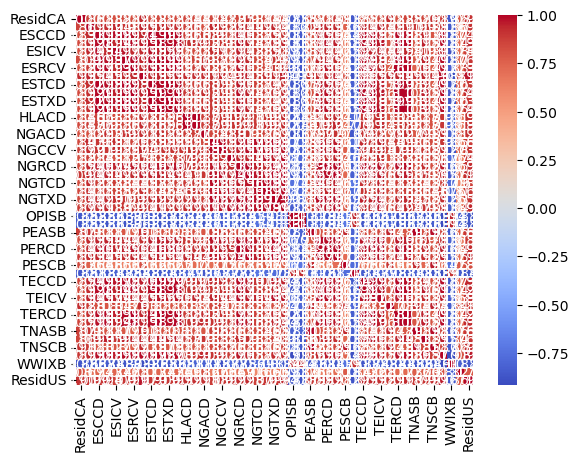

In [21]:
# Correlation analysis
df = df_high_corr
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
data6 = df_high_corr
a = data6.columns.tolist()[1:]

In [23]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[data6.columns.tolist()[1:]])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   51
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -521.198
Date:                Wed, 26 Apr 2023   AIC                           1134.397
Time:                        18:00:30   BIC                           1223.261
Sample:                    01-01-1970   HQIC                          1168.354
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DFSCB         -0.0228      0.107     -0.212      0.832      -0.233       0.187
ESCCD      -4.113e+04    230.289   -178.590      0.000   -4.16e+04   -4.07e+04
ESCCV        443.6088     79.989      5.546      0.0

In [24]:
# load data with two year shift
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")
data


data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
a = "1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721 1 1"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data3 = pd.concat([data2,Resid_total])

a = "13,728,645	14,210,554	14,861,651	14,919,481	14,651,895	14,814,536	15,417,206	15,663,022	16,143,315	15,813,447	15,731,634	15,247,535	15,497,034	15,399,060	15,920,721	16,041,775	15,951,750	16,228,823	17,132,762	17,775,513	16,930,638	17,401,226	17,331,937	18,209,357	18,093,506	18,508,903	19,500,508	18,957,636	18,941,595	19,535,978	20,384,790	20,026,646	20,763,207	21,080,842	21,042,686	21,574,410	20,631,559	21,489,150	21,635,346	21,052,360	21,860,325	21,345,572	19,828,618	21,018,102	21,418,020	20,586,481	20,157,650	19,861,744	21,486,929	21,042,063	20,520,596"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidUS"},inplace=True)
Resid_total.columns = data2.columns
data3 = pd.concat([data3,Resid_total])
data3
feature_list = data3.index.tolist()
feature_list.remove("ResidCA")
data4 = data3.T
data4
data4.describe()
df = data4
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)
df.describe()
data5 = df
data5 = data5.fillna(0)
data5

data_fut = data5.loc[['2019','2020']]
data_fut
data5 = data5.drop(['2019','2020'])
data5


,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA,ResidUS
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,1.39,55.8,1.40,55.4,4.14,10.5,748.0,3169.0,1192848,13728645
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,1.40,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1189801,14210554
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1148722,14861651
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1220587,14919481
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1202586,14651895
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1154079,14814536
1976,1.60,149.6,1.60,149.6,1.60,149.6,3.59,28.4,3.59,28.4,...,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1196279,15417206
1977,1.70,169.1,1.70,169.1,1.70,169.1,3.97,33.0,3.97,33.0,...,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1290698,15663022
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1226364,16143315
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1192869,15813447


In [25]:
# drop duplicate data feature

# TNASB & PEASB
# OPSCB & OPISB
data6 = data5.drop(['TNASB','OPSCB'],axis = 1)
data6
features = data5.drop("ResidCA",axis = 1)

In [26]:
# Load dataset
df = data6
# Create correlation matrix
corr_matrix = df.corr().abs()

# Find features with correlation greater than 0.5 with 'ResidCA'
high_corr_features = corr_matrix[corr_matrix['ResidCA'] > 0.85].index.tolist()

# Remove 'ResidCA' from the list of high correlation features
high_corr_features.remove('ResidCA')

# Select only high correlation features with 'ResidCA'
df_high_corr = df[['ResidCA'] + high_corr_features]

df_high_corr

,ResidCA,DFSCB,ESSCB,NGRCV,OPISB,PEASB,TEPFB,TNSCB,TPOPP,WWIXB,ResidUS
1970,1192848,224717.0,396018.0,544.3,34048.0,1814079.0,1472146.0,4026993.0,20007.0,59783.0,13728645
1971,1189801,273402.0,419853.0,652.4,38173.0,1888703.0,1505667.0,4241990.0,20346.0,61039.0,14210554
1972,1148722,265247.0,451137.0,687.6,38336.0,1911495.0,1597518.0,4274489.0,20585.0,66904.0,14861651
1973,1220587,297691.0,465656.0,714.8,37789.0,1964194.0,1662750.0,4384316.0,20869.0,69551.0,14919481
1974,1202586,250298.0,437531.0,800.4,40034.0,1877816.0,1611282.0,4205043.0,21174.0,72152.0,14651895
1975,1154079,242424.0,496939.0,993.8,38877.0,1931418.0,1729876.0,4302965.0,21538.0,64728.0,14814536
1976,1196279,264184.0,519265.0,1061.9,44931.0,2045431.0,1814624.0,4371695.0,21936.0,74844.0,15417206
1977,1290698,298135.0,527073.0,1022.2,46919.0,2188626.0,1856350.0,4505114.0,22352.0,77087.0,15663022
1978,1226364,348910.0,542893.0,1066.8,52729.0,2355039.0,1884696.0,4587999.0,22836.0,80541.0,16143315
1979,1192869,384913.0,565632.0,1458.5,46805.0,2333123.0,1945802.0,4781813.0,23257.0,81617.0,15813447


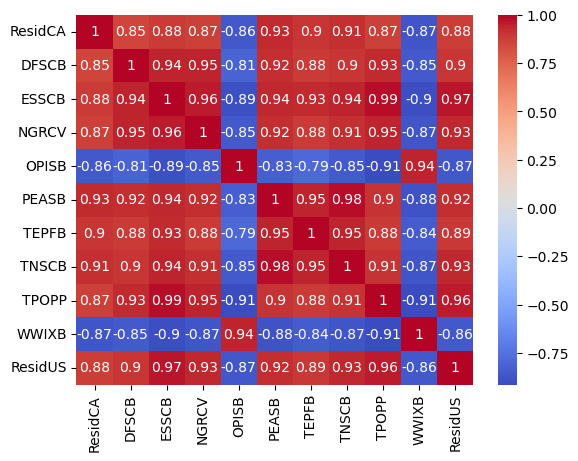

In [27]:
# Correlation analysis
df = df_high_corr
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
data_fut2 = data_fut
data_fut2 = data_fut2[high_corr_features]
data_fut2

,DFSCB,ESSCB,NGRCV,OPISB,PEASB,TEPFB,TNSCB,TPOPP,WWIXB,ResidUS
2019,566221.0,846178.0,6017.5,10342.0,3029638.0,2149057.0,5641047.0,39438.0,11025.0,21042063
2020,527670.0,845308.0,6483.2,9483.0,2330345.0,2088910.0,4833847.0,39500.0,11006.0,20520596


In [29]:
high_corr_features.remove('ResidUS')
high_corr_features

['DFSCB',
 'ESSCB',
 'NGRCV',
 'OPISB',
 'PEASB',
 'TEPFB',
 'TNSCB',
 'TPOPP',
 'WWIXB']

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                ResidCA   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -583.184
Date:                Wed, 26 Apr 2023   AIC                           1188.369
Time:                        18:01:06   BIC                           1209.179
Sample:                    01-01-1970   HQIC                          1196.264
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DFSCB         -0.2562      0.301     -0.850      0.395      -0.847       0.335
ESSCB         -1.8390      0.445     -4.134      0.000      -2.711      -0.967
NGRCV          4.8204     18.077      0.267      0.7

C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3936857681.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['2019-01-01', '', '', '', '', '', '2020-01-01'])
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3936857681.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

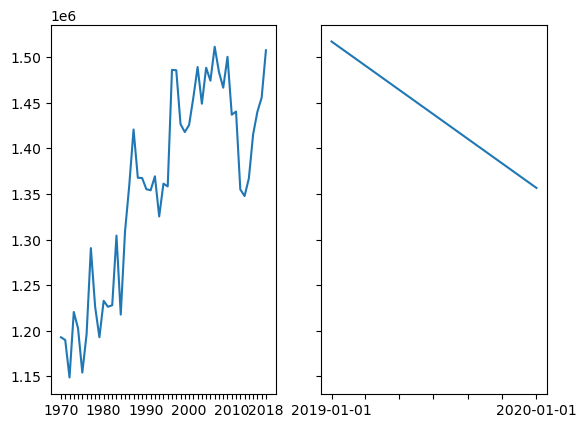

In [33]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=data5[high_corr_features])

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())

forecast = results.forecast(steps=2,exog = data_fut[high_corr_features])

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(forecast)
ax2.xaxis.set_ticklabels(['2019-01-01', '', '', '', '', '', '2020-01-01'])
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\1257772617.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

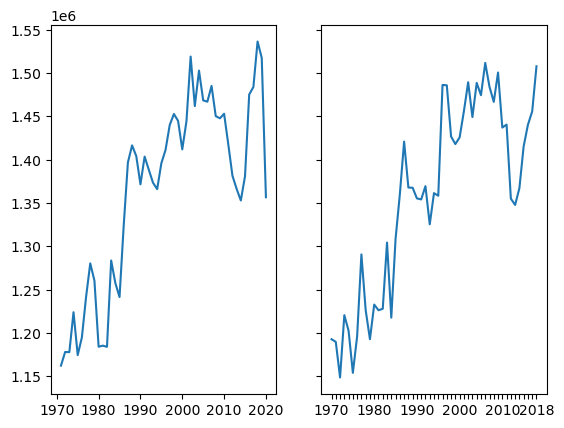

In [34]:
forecast = results.predict(start=1, end=50, exog=data_fut[high_corr_features])

# Print the forecasted values
# print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

([<matplotlib.axis.XTick at 0x19eccac4670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

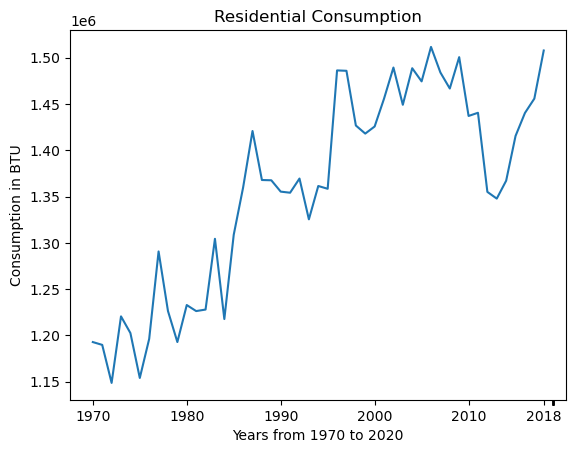

In [35]:
plt.plot(data5["ResidCA"])
plt.xlabel('Years from 1970 to 2020')
plt.ylabel('Consumption in BTU')
plt.title('Residential Consumption')
plt.xticks(x_values)

In [28]:
high_corr_features[4]

'PEASB'

([<matplotlib.axis.XTick at 0x19eccf90dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

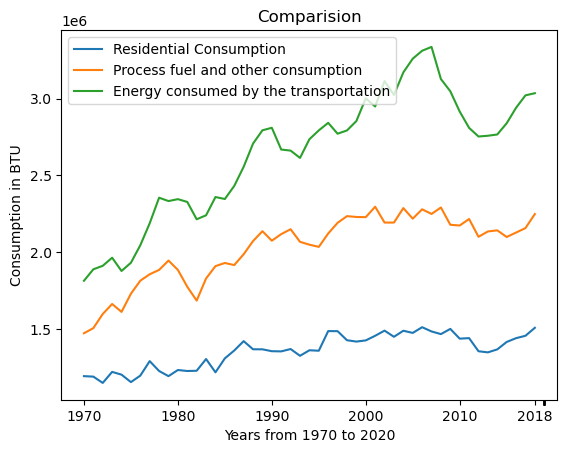

In [36]:
plt.plot(data5["ResidCA"],label = "Residential Consumption")
plt.xlabel('Years from 1970 to 2020')
plt.ylabel('Consumption in BTU')
plt.title('Comparision')

# plt.plot(data5[high_corr_features[6]],label = "Total net energy consumption")
plt.plot(data5[high_corr_features[5]], label = "Process fuel and other consumption")
plt.plot(data5[high_corr_features[4]], label = "Energy consumed by the transportation")
plt.legend()
plt.xticks(x_values)

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Create example data
np.random.seed(42)
X = df_high_corr

# Fit PCA model
pca = PCA(n_components=0.85)
pca.fit(X)
X_pca = pca.transform(X)

# Create scatter plot
# plt.scatter(X_pca[:, 0], X_pca[:, 1])

# # Add axis labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot')

# # Show plot
# plt.show()


In [38]:
a = pd.DataFrame(X_pca)
a

,0
0,4.717999e+06
1,4.194600e+06
2,3.550990e+06
3,3.456125e+06
4,3.770102e+06
5,3.575731e+06
6,2.955230e+06
7,2.662770e+06
8,2.157106e+06
9,2.433093e+06


In [39]:

X = features

# Fit PCA model
pca = PCA(n_components=0.85)
pca.fit(X)
X_pca = pca.transform(X)

# Create scatter plot
# plt.scatter(X_pca[:, 0], X_pca[:, 1])

# # Add axis labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Plot')

# Show plot

In [40]:
df = features
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized = df_normalized.fillna(0)

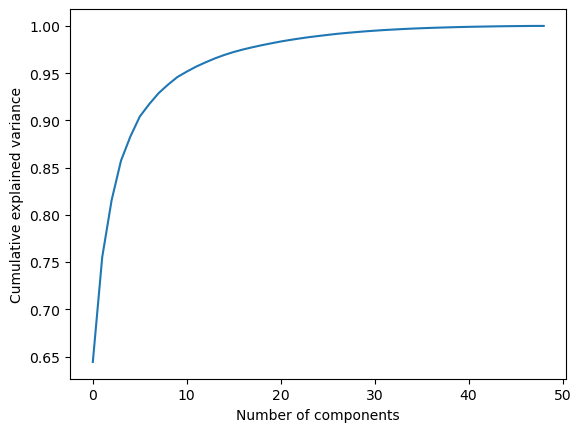

In [41]:
data = df_normalized

# Create a PCA object and fit the data
pca = PCA().fit(data)

# Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [42]:
X = df_normalized

# Fit PCA model
pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)

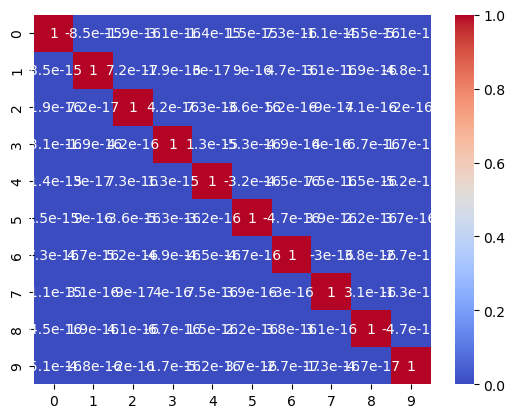

In [43]:
df = pd.DataFrame(X_pca)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [44]:

df.index = data5.index
a = pd.concat([df,data5["ResidCA"]],axis = 1)

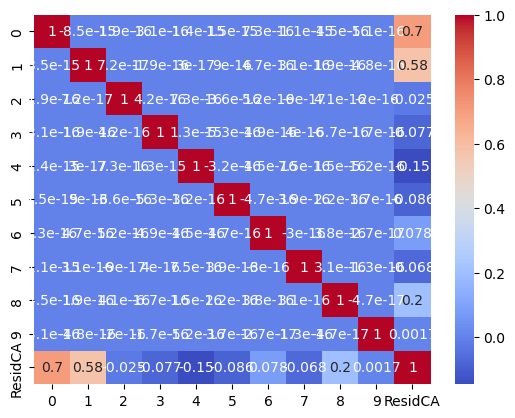

In [45]:
# Correlation analysis
df = a
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3510116881.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)


1971-01-01    1189801.0
1972-01-01    1148722.0
1973-01-01    1220587.0
1974-01-01    1202586.0
1975-01-01    1154079.0
1976-01-01    1196279.0
1977-01-01    1290698.0
1978-01-01    1226364.0
1979-01-01    1192869.0
1980-01-01    1232826.0
1981-01-01    1226313.0
1982-01-01    1227952.0
1983-01-01    1304360.0
1984-01-01    1217724.0
1985-01-01    1308727.0
1986-01-01    1359856.0
1987-01-01    1420797.0
1988-01-01    1367856.0
1989-01-01    1367567.0
1990-01-01    1355310.0
1991-01-01    1354131.0
1992-01-01    1369438.0
1993-01-01    1325392.0
1994-01-01    1361384.0
1995-01-01    1358381.0
1996-01-01    1486214.0
1997-01-01    1485795.0
1998-01-01    1426721.0
1999-01-01    1417985.0
2000-01-01    1425659.0
2001-01-01    1455716.0
2002-01-01    1489320.0
2003-01-01    1449101.0
2004-01-01    1488574.0
2005-01-01    1474374.0
2006-01-01    1511586.0
2007-01-01    1483981.0
2008-01-01    1466657.0
2009-01-01    1500559.0
2010-01-01    1437024.0
2011-01-01    1440463.0
2012-01-01    13

[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

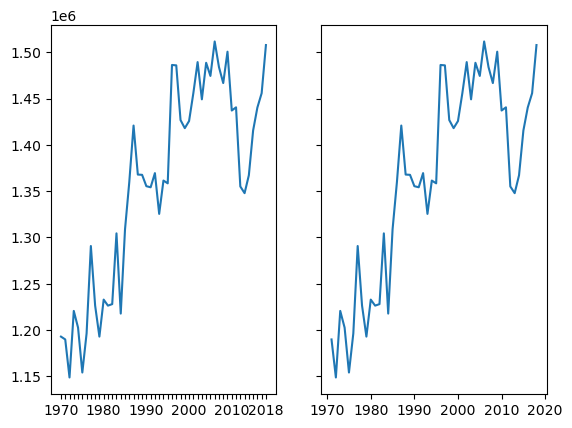

In [48]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(data5["ResidCA"], exog=df)

# Fit the model
results = model.fit()

# Print the model summary
# print(results.summary())

forecast = results.predict(start = 1,end = 48)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(forecast)
ax1.plot(data5["ResidCA"])
ax1.xaxis.set_ticklabels(x_values)

In [47]:
train_y = data5["ResidCA"][:47]
train_x = df[df.columns][:47]
test_y = data5["ResidCA"][47:]
test_x = df[df.columns][47:]

1971-01-01    1189801.0
1972-01-01    1148722.0
1973-01-01    1220587.0
1974-01-01    1202586.0
1975-01-01    1154079.0
1976-01-01    1196279.0
1977-01-01    1290698.0
1978-01-01    1226364.0
1979-01-01    1192869.0
1980-01-01    1232826.0
1981-01-01    1226313.0
1982-01-01    1227952.0
1983-01-01    1304360.0
1984-01-01    1217724.0
1985-01-01    1308727.0
1986-01-01    1359856.0
1987-01-01    1420797.0
1988-01-01    1367856.0
1989-01-01    1367567.0
1990-01-01    1355310.0
1991-01-01    1354131.0
1992-01-01    1369438.0
1993-01-01    1325392.0
1994-01-01    1361384.0
1995-01-01    1358381.0
1996-01-01    1486214.0
1997-01-01    1485795.0
1998-01-01    1426721.0
1999-01-01    1417985.0
2000-01-01    1425659.0
2001-01-01    1455716.0
2002-01-01    1489320.0
2003-01-01    1449101.0
2004-01-01    1488574.0
2005-01-01    1474374.0
2006-01-01    1511586.0
2007-01-01    1483981.0
2008-01-01    1466657.0
2009-01-01    1500559.0
2010-01-01    1437024.0
2011-01-01    1440463.0
2012-01-01    13

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3168900169.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(x_values)


[Text(0, 0, '1970'),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, '1980'),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, '1990'),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, '2000'),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, '2010'),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, '2018')]

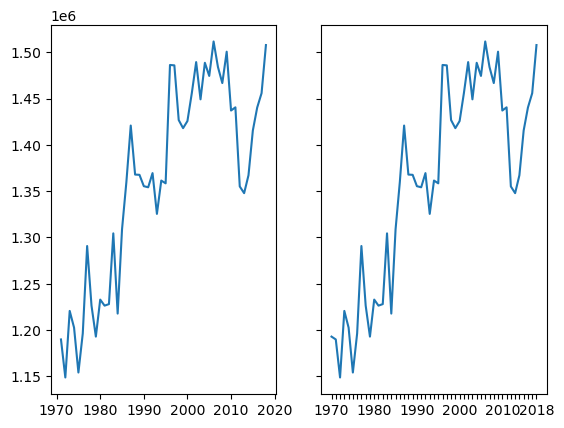

In [49]:
# Create the ARIMA model with exogenous variables
model = sm.tsa.SARIMAX(train_y, exog=train_x)

# Fit the model
results = model.fit()

# Print the model summary
# print(results.summary())

forecast = results.predict(start=1,end=48,exog = test_x)

# Print the forecasted values
print(forecast)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(forecast)
ax2.plot(data5["ResidCA"])
ax2.xaxis.set_ticklabels(x_values)

In [50]:
train_y[-2:]

2015    1415455
2016    1440273
Name: ResidCA, dtype: int64

In [51]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df.columns

RangeIndex(start=0, stop=10, step=1)

In [52]:
df = a



# Split the data into training and testing sets
train = df.iloc[:len(df)-10]
test = df.iloc[len(df)-10:]

# Fit a SARIMAX model on the long-format dataframe
model = SARIMAX(endog=train['ResidCA'], exog=train[X_pca_df.columns], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Use the fitted model to make predictions on the testing set
test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])

# Reshape the predicted values back to wide format
predictions = test["Prediction"]

predictions = results.forecast(steps=len(test),exog = test[X_pca_df.columns])

# Calculate the MAPE for the predictions
mape = mean_absolute_percentage_error(test["ResidCA"], predictions)
print(f"MAPE: {mape}")


C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE: 0.1681340473801779


C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\1411475429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])


In [53]:
mape

0.1681340473801779

2009-01-01    1.462602e+06
2010-01-01    1.533819e+06
2011-01-01    1.546660e+06
2012-01-01    1.578186e+06
2013-01-01    1.631374e+06
2014-01-01    1.688055e+06
2015-01-01    1.756666e+06
2016-01-01    1.774257e+06
2017-01-01    1.759795e+06
2018-01-01    1.844356e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3524952906.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\3524952906.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])


[Text(0, 0, ''),
 Text(1, 0, '2010'),
 Text(2, 0, ''),
 Text(3, 0, '2012'),
 Text(4, 0, ''),
 Text(5, 0, '2014'),
 Text(6, 0, ''),
 Text(7, 0, '2016'),
 Text(8, 0, ''),
 Text(9, 0, '2018')]

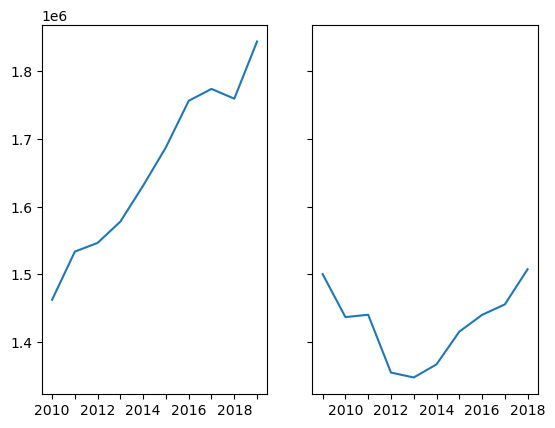

In [60]:
print(predictions)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(predictions)
ax2.plot(test["ResidCA"])
ax1.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])
ax2.xaxis.set_ticklabels(['', '2010', '', '2012', '', '2014', '', '2016', '', '2018', ''])

C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lysea\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE: 0.01467848310410386
2017-01-01    1.432988e+06
2018-01-01    1.487035e+06
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\2104351091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\2104351091.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_ticklabels(x_values)
C:\Users\lysea\AppData\Local\Temp\ipykernel_39376\2104351091.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_ticklabels(['2017-01-01', '', '', '', '', '', '2018-01-01'])


[Text(17167.0, 0, '2017-01-01'),
 Text(17226.0, 0, ''),
 Text(17287.0, 0, ''),
 Text(17348.0, 0, ''),
 Text(17410.0, 0, ''),
 Text(17471.0, 0, ''),
 Text(17532.0, 0, '2018-01-01')]

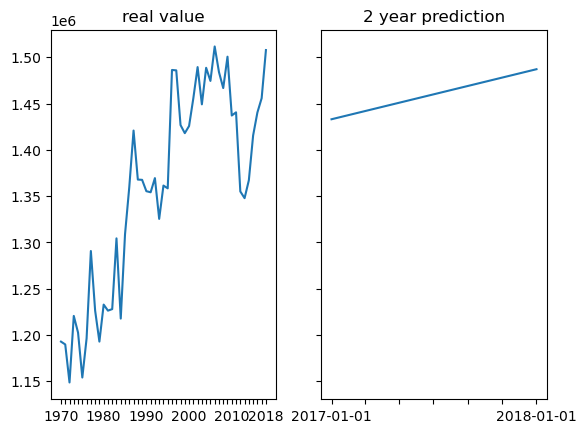

In [62]:
df = a



# Split the data into training and testing sets
train = df.iloc[:len(df)-2]
test = df.iloc[len(df)-2:]

# Fit a SARIMAX model on the long-format dataframe
model = SARIMAX(endog=train['ResidCA'], exog=train[X_pca_df.columns], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Use the fitted model to make predictions on the testing set
test['Prediction'] = results.predict(start=len(train), end=len(df)-1, exog=test[X_pca_df.columns])

# Reshape the predicted values back to wide format
predictions = test["Prediction"]

predictions = results.forecast(steps=len(test),exog = test[X_pca_df.columns])

# Calculate the MAPE for the predictions
mape = mean_absolute_percentage_error(test["ResidCA"], predictions)
print(f"MAPE: {mape}")
print(predictions)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax2.plot(predictions)
ax1.plot(data5["ResidCA"])
# f.suptitle('Two Subplots')
ax2.set_title('2 year prediction')
ax1.set_title('real value')

ax1.xaxis.set_ticklabels(x_values)
ax2.xaxis.set_ticklabels(['2017-01-01', '', '', '', '', '', '2018-01-01'])